# Inferential Statistics 

**Inferential Statistics** refers to the branch of statistics that uses sample data to make generalizations or inferences about a larger population. 

Unlike descriptive statistics, which summarize data from a sample, inferential statistics aim to draw conclusions that go beyond the immediate data.

# Hypothesis Testing

In [2]:
import numpy as np
import pandas as pd

np.random.seed(123)
n = 500
drug_group = np.random.normal(8, 2, n)
placebo_group = np.random.normal(6, 2, n)
df = pd.DataFrame({'drug_symptom_reduction': drug_group, 'placebo_symptom_reduction': placebo_group})
df

,drug_symptom_reduction,placebo_symptom_reduction
0,5.828739,7.504067
1,9.994691,6.139281
2,8.565957,5.469109
3,4.987411,7.859169
4,6.842799,8.521643
...,...,...
495,9.135760,7.269526
496,9.025966,8.139837
497,7.946155,4.181346
498,8.623163,6.940527


In [3]:
# A t-test is a statistical test used to compare the means of two groups. It helps determine if there is a significant difference between the means of two datasets. 
# The p-value is the probability that the observed results occurred by chance, assuming that the null hypothesis is true. It helps you determine the significance of your results. 

from scipy.stats import ttest_ind

t_test, p_value = ttest_ind( df['drug_symptom_reduction'], df['placebo_symptom_reduction'] )

print("T Test: ", t_test)
print("P Values: ", p_value)

T Test:  15.812191976007728
P Values:  1.996722963460507e-50


Low p-value (≤ 0.05): This means your results are unlikely to have happened by chance.
High p-value (> 0.05): This means your results could have happened by chance.

# T-Test

**One Sample T-Test:** test will tell us whether means of sample and population is different.
      
  t = x - U / S
                x

In [5]:
ages = [23, 17, 35, 29, 41, 19, 22, 38, 27, 33, 21, 45, 16, 30, 25, 18, 44, 20, 32, 24, 31, 28, 26, 34, 39, 40, 37, 36, 43, 42]

import numpy as np
ages_mean = np.mean(ages)
print(ages_mean)   
# Mean of population(data)

30.5


In [14]:
# Take sample from data

sample_size = 10
age_sample = np.random.choice(ages, sample_size)
age_sample

array([32, 27, 43, 27, 37, 17, 38, 34, 39, 22])

In [10]:
from scipy.stats import ttest_1samp

ttest, p_value = ttest_1samp(age_sample , 30)
print("TTest : ", ttest)
print("P_Value : ", ttest)

TTest :  0.9147434153237062
P_Value :  0.9147434153237062


In [12]:
if p_value < 0.05:
    print(" We are rejecting Null Hypothesis ")
else:
    print(" We are accpeting Null Hypothesis ")

 We are accpeting Null Hypothesis 


In [18]:
# Example: Consider the age of student in college and in Class A

import numpy as np
import pandas as pd
import scipy.stats as stats
import math

np.random.seed(6)

school_ages = stats.poisson.rvs(loc=18, mu=35, size=1500)
classA_ages = stats.poisson.rvs(loc=10, mu=30, size=60)

In [19]:
classA_ages.mean()

38.9

In [21]:
_, pvalue = ttest_1samp(a=classA_ages, popmean= school_ages.mean()) # sample and mean of population

if pvalue < 0.05:
    print(" We are rejecting Null Hypothesis ") # means there is difference
else:
    print(" We are accpeting Null Hypothesis ") # means there is no difference

 We are rejecting Null Hypothesis 


**Two sample T-Test:** compares the means of two independent groups inorder to define whether there is statistical difference or not.

Also called Independent Sample T-Test

In [22]:
np.random.seed(12)
classB_ages = stats.poisson.rvs(loc=18, mu=33, size=60)
#               starts from (initial) ,mean , size of data

classB_ages.mean()

50.63333333333333

In [24]:
_, pval = stats.ttest_ind(a = classA_ages, b= classB_ages, equal_var= False)
print(pval)

if p_value < 0.05:
    print(" We are rejecting Null Hypothesis ")
else:
    print(" We are accpeting Null Hypothesis ")

9.090823806881507e-21
 We are accpeting Null Hypothesis 


**Paired T-Test:** when you want to check how different samples from the same group are, we use paired ttest.

In [26]:
weight1 = [25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45 ]
weight2 = weight1 + stats.norm.rvs(scale=5, loc=1.25, size=15)

print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[18.6845637  27.43234756 30.49601605 28.30095696 24.35237039 35.86380814
 35.69646047 31.13874933 31.4100301  36.91607782 23.93952644 29.58685451
 36.46370697 36.63369994 48.53845269]


In [31]:
weight_df = pd.DataFrame({"weight_10": np.array(weight1),
                        "weight_20": np.array(weight2),
                        "weight_change": np.array(weight2) - np.array(weight1)
                         })

weight_df.head()

,weight_10,weight_20,weight_change
0,25,18.684564,-6.315436
1,30,27.432348,-2.567652
2,28,30.496016,2.496016
3,35,28.300957,-6.699043
4,28,24.352370,-3.647630


In [33]:
_, pvaluee = stats.ttest_rel(a= weight1, b=weight2 )

print(pvaluee)

if p_value < 0.05:
    print(" We are rejecting Null Hypothesis ")
else:
    print(" We are accpeting Null Hypothesis ")

0.39907052675466614
 We are accpeting Null Hypothesis 


# Confidence intervals 

**Confidence Intervals** (CIs) are a range of values, derived from sample data, that are used to estimate an unknown population parameter (such as a population mean or proportion). They provide a range within which we can say, with a certain level of confidence, that the population parameter lies.

CI = sample mean +- zscore (std / sqrt of sample size)

In [34]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [35]:
data = [0, 0, 1, 0, 1, 0, 2, 2, 3, 3, 4]

sample_mean = np.mean(data)
sample_std = np.std(data, ddof=1)

n = len(data)

confidence_level = 0.95

alpha = 1 - confidence_level
z_critical = stats.norm.ppf(1- alpha / 2)

margin_of_error = z_critical * (sample_std / np.sqrt(n) )

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print("Confidence Interval: ", confidence_interval)

Confidence Interval:  (0.6037545676904135, 2.305336341400496)


# Chi-Square Test

**The Chi-Square Test** is a statistical test used to determine whether there is a significant association between categorical variables or if a distribution of categorical data matches an expected distribution. It is primarily used for testing relationships between categorical variables.

To Check: Whether two categorical variables are corelated or not. they have some assosiation

In [39]:
import scipy.stats as stats
categories = [[24, 83, 17], [11, 62, 28], [32, 121, 34], [10, 26, 44]]
# from table write data in the form of row

chi2, p_value, dof, expected_freq = stats.chi2_contingency(categories)

print("Chi Value: ", chi2)
print("P Value: ", p_value)
print("DOF: ", dof)
print("Expected Frequencies: ", expected_freq)

print()
if p_value < 0.05:
    print(" We are rejecting Null Hypothesis ")
else:
    print(" We are accpeting Null Hypothesis ")

Chi Value:  54.10532318070527
P Value:  7.025027345478898e-10
DOF:  6
Expected Frequencies:  [[ 19.40650407  73.59349593  31.        ]
 [ 15.80691057  59.94308943  25.25      ]
 [ 29.26626016 110.98373984  46.75      ]
 [ 12.5203252   47.4796748   20.        ]]

 We are rejecting Null Hypothesis 


# ANOVA Test: Analysis of Variance

**ANOVA** (Analysis of Variance) is a statistical method used to compare the means of three or more groups to determine if there is a statistically significant difference between them. It tests whether the differences between group means are greater than would be expected by chance.

Formula = Mean Sum of Squares Between Groups / Mean Sum of Squares Within Groups

# One Way ANOVA

Used when comparing the means of three or more independent groups based on one factor or independent variable.

Example: Testing whether the average test scores are different across three different teaching methods.

In [44]:
Conntry_A = [5, 4, 3, 5, 6, 7, 3]
Conntry_B = [6, 7, 8, 5, 4, 3, 4]
Conntry_C = [4, 5, 6, 7, 3, 4, 5]

import scipy.stats as stats

statss, p_val = stats.f_oneway(Conntry_A, Conntry_B, Conntry_C)

print("Stas: ", statss)
print("P Value ", p_val)

print()
if p_val < 0.05:
    print(" We are rejecting Null Hypothesis ") # means they have different means (difference)
else:
    print(" We are accpeting Null Hypothesis ") # means they all have same mean (No difference)

Stas:  0.25490196078431376
P Value  0.7777431274263891

 We are accpeting Null Hypothesis 


In [45]:
# Another Example

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

np.random.seed(12)

races = ['asian', 'black', 'hispanic', 'other', 'white']

voter_race = np.random.choice(a= races, p= [0.05, 0.15, 0.25, 0.05, 0.5], size=1000)

voter_age = stats.poisson.rvs(loc=18, mu=30, size=1000)

# Group age data by race
voter_frame = pd.DataFrame({"race": voter_race, "age": voter_age})
groups = voter_frame.groupby("race").groups

# Extract indivisual groups
asian = voter_age[groups["asian"]]
black = voter_age[groups["black"]]
hispanic = voter_age[groups["hispanic"]]
other = voter_age[groups["other"]]
white = voter_age[groups["white"]]

# Perform the ANOVA
stats.f_oneway(asian, black, hispanic, other, white)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

group1,group2,meandiff,p-adj,lower,upper,reject
asian,black,-1.3353,0.5848,-2.7893,0.1186,False
asian,hispanic,-0.7593,0.9062,-2.1451,0.6264,False
asian,other,-0.0264,1.0,-1.7753,1.7225,False
asian,white,-1.4184,0.4319,-2.7473,-0.0895,True
black,hispanic,0.576,0.8362,-0.3073,1.4594,False
black,other,1.309,0.5571,-0.0762,2.6941,False
black,white,-0.0831,0.9998,-0.8742,0.7081,False
hispanic,other,0.733,0.9003,-0.5805,2.0464,False
hispanic,white,-0.6591,0.4976,-1.3166,-0.0015,True
other,white,-1.392,0.3899,-2.6453,-0.1388,True


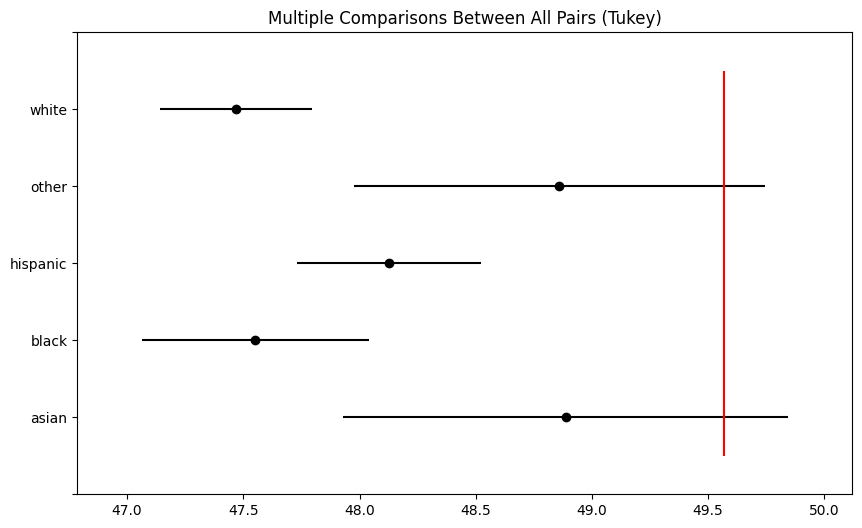

In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog= voter_age, groups= voter_race, alpha= 0.5)

tukey.plot_simultaneous()
plt.vlines(x= 49.57, ymin= -0.5, ymax= 4.5, color= "red")

tukey.summary()

# Two way ANOVA

Used when comparing the means of groups based on two independent factors. It also tests for interaction effects between the two factors.

Example: Testing whether both teaching methods and student gender affect test scores, and whether there's any interaction between the two factors.